<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%2014%20(7-19)%20Project%20on%20Creating%20a%20Model%20for%20House%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction
This is the implementation of Day 14's Action Item for SureStart's summer program, 2021. 

The tutorial for this model development activity can be found [ here](https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4)



# Model 1

 **Data Preprocessing Steps**

In [5]:
#Importing necessary libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [6]:
#Importing dataset 
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata (1).csv


In [7]:
#Importing dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

In [8]:
#Converting data to array format
dataset = df.values

In [9]:
#Assigning first 10 columns of data in array to x
X = dataset[:,0:10]

In [10]:
#Assigning last column of data in array to y
Y = dataset[:,10]

In [11]:
#Scaling data for normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
#Splitting dataset into train, test, and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Building and Training the Model**

In [15]:
#Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#Defining model architecture/structure
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
# Model configuration
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
#Training model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 18ms/step - loss: 0.6901 - accuracy: 0.5065 - val_loss: 0.6755 - val_accuracy: 0.5662
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6146 - val_loss: 0.6619 - val_accuracy: 0.7717
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7501 - val_loss: 0.6512 - val_accuracy: 0.8082
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7930 - val_loss: 0.6422 - val_accuracy: 0.8174
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7629 - val_loss: 0.6339 - val_accuracy: 0.8082
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7921 - val_loss: 0.6259 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.7629 - val_loss: 0.6179 - val_accuracy: 0.8082
Epoch 8/100

In [19]:
#Evaluating model on test dataset
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8676


0.8675799369812012

**Visualizing Loss & Accuracy**

In [20]:
#Import library
import matplotlib.pyplot as plt

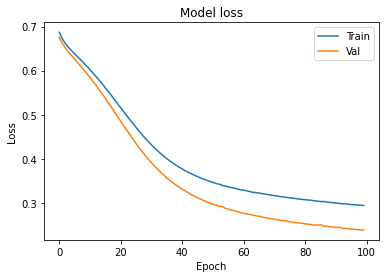

In [21]:
#Visualizing the loss of the model on the training and validation dataset
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

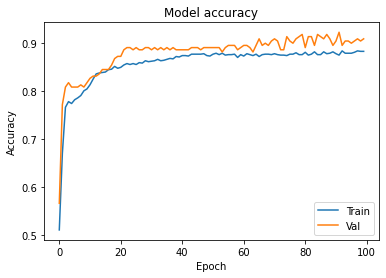

In [22]:
#Visualizing the accuracy of the model on the training and validation dataset
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Showcasing the Need for Regularization - Making Another Model

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 47ms/step - loss: 0.6197 - accuracy: 0.6034 - val_loss: 0.3393 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3738 - accuracy: 0.8522 - val_loss: 0.2613 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3826 - accuracy: 0.8490 - val_loss: 0.2422 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3186 - accuracy: 0.8759 - val_loss: 0.2251 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2604 - accuracy: 0.9021 - val_loss: 0.2443 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2802 - accuracy: 0.8689 - val_loss: 0.2151 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2584 - accuracy: 0.8810 - val_loss: 0.2047 - val_accuracy: 0.8995
Epoch 

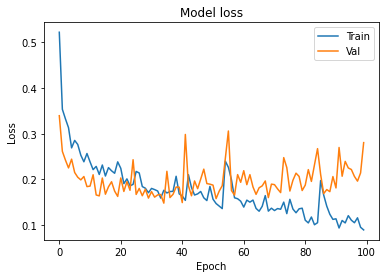

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

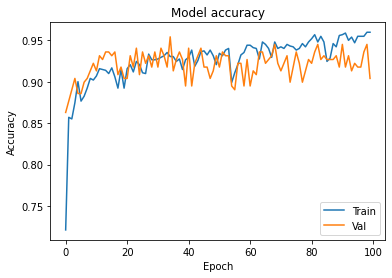

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Additional Model to Reduce the Over-Fitting in Model 2

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 63ms/step - loss: 21.0897 - accuracy: 0.5631 - val_loss: 3.8703 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4898 - accuracy: 0.8163 - val_loss: 0.6180 - val_accuracy: 0.9132
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5829 - accuracy: 0.8657 - val_loss: 0.4864 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5575 - accuracy: 0.8420 - val_loss: 0.4594 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4929 - accuracy: 0.8676 - val_loss: 0.4316 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5037 - accuracy: 0.8687 - val_loss: 0.4231 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5171 - accuracy: 0.8521 - val_loss: 0.4106 - val_accuracy: 0.9269
Epoch

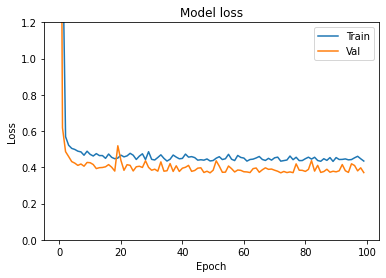

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

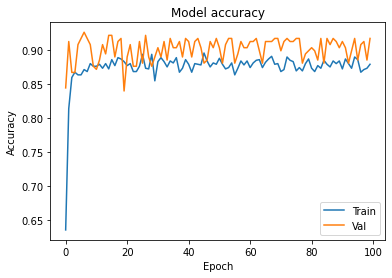

In [33]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()